In [12]:
from qiskit import QuantumCircuit, transpile, result
from qiskit_aer import AerSimulator
import qiskit.quantum_info as qi
from qiskit.tools.visualization import plot_histogram
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

PSI_00 = qi.Statevector([1, 0])
PSI_10 = qi.Statevector([0, 1])
PSI_01 = qi.Statevector([1/sqrt(2), 1/sqrt(2)])
PSI_11 = qi.Statevector([1/sqrt(2), -1/sqrt(2)])
PSI_LOOKUP = np.array([[PSI_00, PSI_01], [PSI_10, PSI_11]])

In [2]:
BITLENGTH = 5

In [6]:
bitstring = np.random.randint(0, 2, BITLENGTH)
bases_alice = np.random.randint(0, 2, BITLENGTH)
bases_bob = np.random.randint(0, 2, BITLENGTH)
print('Bitstring: \t', bitstring)
print('Bases - Alice: \t', bases_alice)
print('Bases - Bob: \t', bases_bob)

Bitstring: 	 [1 1 0 0 1]
Bases - Alice: 	 [1 1 0 0 1]
Bases - Bob: 	 [0 0 1 1 1]


In [7]:
# Generate the quantum circuit
qc = QuantumCircuit(BITLENGTH, BITLENGTH)
qc.initialize('0' * BITLENGTH, qc.qubits)

psi = np.array([])
for i in range(BITLENGTH):
    if(bitstring[i] == 1):
        qc.x(i)
    if(bases_alice[i] == 1):
        qc.h(i)
        
    if(i==0):
        psi = PSI_LOOKUP[bitstring[i], bases_alice[i]]
    else:
        psi = np.kron(psi, PSI_LOOKUP[bitstring[i], bases_alice[i]])

print(qc)

     ┌────────────────────────┐┌───┐┌───┐
q_0: ┤0                       ├┤ X ├┤ H ├
     │                        │├───┤├───┤
q_1: ┤1                       ├┤ X ├┤ H ├
     │                        │└───┘└───┘
q_2: ┤2 Initialize(0,0,0,0,0) ├──────────
     │                        │          
q_3: ┤3                       ├──────────
     │                        │┌───┐┌───┐
q_4: ┤4                       ├┤ X ├┤ H ├
     └────────────────────────┘└───┘└───┘
c: 5/════════════════════════════════════
                                         


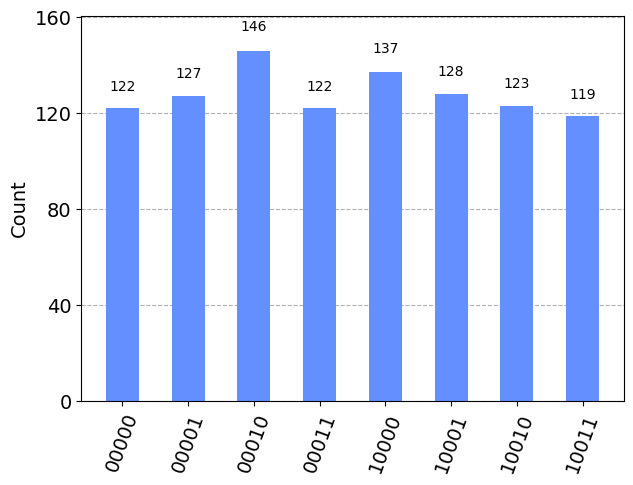

In [8]:
simulator = AerSimulator()
qc.measure(list(range(qc.num_qubits)), list(range(qc.num_clbits)))
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc).result()
counts = result.get_counts()
plot_histogram(counts)

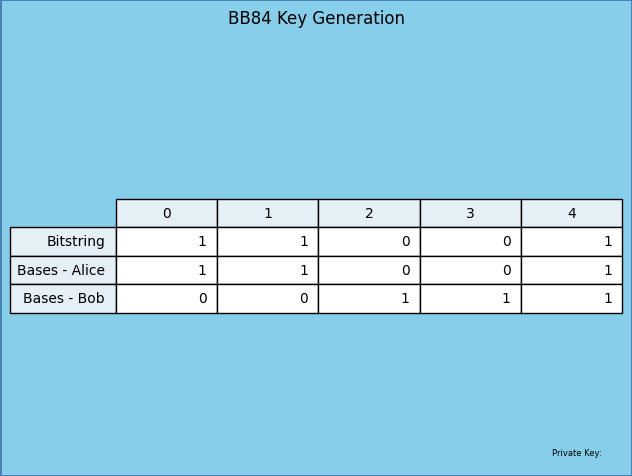

In [13]:
def generate_table(bitstring, bases_alice, bases_bob, measurements=None):
    title_text = 'BB84 Key Generation'
    footer_text = 'Private Key: '
    fig_background_color = 'skyblue'
    fig_border = 'steelblue'

    data = [
        bitstring,
        bases_alice,
        bases_bob,
        #measurements
    ]

    column_headers = [x for x in range(BITLENGTH)]
    row_headers = ['Bitstring', 'Bases - Alice', 'Bases - Bob'] #'Measurements - Bob']

    rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))

    plt.figure(linewidth=2,
            edgecolor=fig_border,
            facecolor=fig_background_color,
            tight_layout={'pad':1},
            #figsize=(5,3)
            )
    the_table = plt.table(cellText=data,
                        rowLabels=row_headers,
                        rowColours=rcolors,
                        rowLoc='right',
                        colColours=ccolors,
                        colLabels=column_headers,
                        loc='center')
    # Scaling is the only influence we have over top and bottom cell padding.
    # Make the rows taller (i.e., make cell y scale larger).
    the_table.scale(1, 1.5)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.suptitle(title_text)
    plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')
    plt.draw()
    fig = plt.gcf()
    plt.savefig('key_tablex.png',
                #bbox='tight',
                edgecolor=fig.get_edgecolor(),
                facecolor=fig.get_facecolor(),
                dpi=150
                )
    plt.show()

generate_table(bitstring, bases_alice, bases_bob) #, measurements)